# 제 3장. 추측 통계학

### 추측 통계학

* 관측 데이터(표본)으로부터, 모집단의 특성을 추측하는 학문.
* 모수(Parameter): 모집단의 평균, 분산 등 모집단의 분포 형태를 결정하는 값.
* 기술통계학과의 차이
  * 기술통계학은 표본의 특징을 파악하기 위한 학문으로 모수를 추측하지는 않음.
  * 추측 통계학은 모수를 추측하므로, "오차" 개념이 있음.
* 데이터가 적을 때는 기술통계학 방식보다는 추측통계학 방식을 사용해야 함.

### 대표본과 소표본

* 기술통계학적 방식을 그대로 데이터 수가 적은 소표본에 이용 시 추측의 정도가 낮아짐 = 소표본의 문제
* 명확한 근거 기반가 있는 것은 아니나, $n \lt 30$ 인 경우를 소표본이라고 하고 $n \geq 30$인 경우를 대표본이라고 부름

### 오차

* 소표본의 경우에도 잘못된 결과가 나오지 않도록 도입한 개념.

    

### 불편 추정(Unbiased estimate)

* 참값인 모수와 비교해 큰 쪽에도 작은 쪽에도 치우치지 않는 통계량.


### 통계량의 치우침

* 기술통계학 방식으로 계산 시 표본분산은 모분산보다 작다.
  * 표본분산 : $S^2 = \frac{\sum(X_i - \bar{X})^2}{n}$
  * 모분산 : $\sigma^2 = \frac{\sum(X_i - \mu)^2}{n}$ 
  * $S^2 \leq \mu^2$
* 이유
  * n이 커질수록 분산은 증가할 가능성이 높음. 
  * 즉 표본분산은 모분산에 비해 상대적으로 $n$이 작아 평균으로부터 편차치가 모분산의 편차치보다 작거나 같아짐.

In [0]:
%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


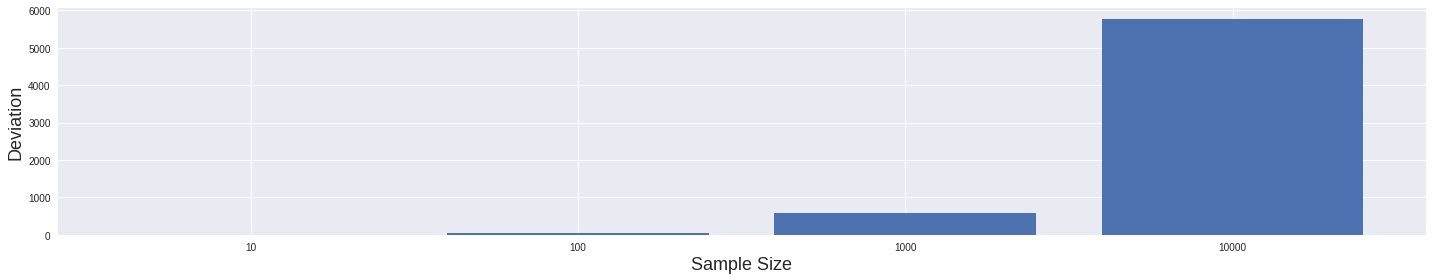

In [0]:
sizes = [10, 100, 1000, 10000]

std_list = []
_, ax = subplots = plt.subplots(figsize=(20, 4))

for num in sizes:
    data = np.linspace(-num, num+1, num)
    std = np.std(data)
    
    std_list.append(std)


ax.bar([f'{size}' for size in sizes], std_list)
plt.xlabel('Sample Size', size=18)
plt.ylabel('Deviation', size=18)
plt.tight_layout()

### 불편추정 방법

* 그러므로 우리는 표본분산 $S^2$식의 분모인 n에서 1을 빼서 값을 조금 작게 함으로써 모분산에 가까이 가게 한다.
* 이를 불편분산이라 한다.
* 불편분산 식은 아래와 같다.
$$\hat{\sigma}^2 = \frac{\sum(X_i - \bar{X})^2}{n - 1}$$
* 불편표준편차 식은 아래와 같다.
$$\hat{\sigma} = \sqrt{\frac{\sum(X_i - \bar{X})^2}{n - 1}}$$

* 여기서 $n - 1$은 자유도라고 부른다.

### 정리

* 불편추정량은 정리하자면, 표본의 정보만으로 모수에 치우침이 없도록 추정(estimate)하는 통계량이다.
* 기호는 표본통계량은 알파벳($S, \bar{X}$ 등), 모수에는 그리스 문자($\mu, \sigma$ 등), 불편추정량은 그리스 문자에 $\hat{}$을 써서 구별한다.
* 평균은 모평균보다 커질 것인지, 작아질 것인지 모르므로 수정할 수 없어 표본평균을 그대로 사용하고, 불편평균이라 부른다.

### 자유도

* 위에서 우리는 $n - 1$을 자유도라고 불렀다.
* 자유도란 통계량 계산 시 사용하는 관측 데이터(변수)중, 자유롭게 값을 취할 수 있는 데이터의 수를 말한다.

**Q. 치즈, 페퍼로니, 하와이, 고구마 토핑이 올라간 4조각으로 나뉜 피자를 `선우, 유진, 혜연, 서연`이 나눠먹어야 한다. 이 때 선택권은 `유진, 혜연, 서연, 선우` 순이라고 했을 때 자유롭게 원하는 토핑의 피자를 선택할 수 있는 사람은 몇명인가?**

**A. 3명(선우는 나머지 하나를 먹어야만 한다)**

* 위의 3명이 자유도의 은유적인 표현이다.
* 비슷하게, 이미 평균이 $5$로 정해졌다고 해보자.
* 총 $3$번의 관측 중 첫번째가 $3$이고 두번째가 $2$라고 했을 때, 마지막 관측값은 반드시 $10$이어야 한다.

$$\frac{3 + 2 + x}{3} = 5$$

* 따라서 불편분산의 계산식에서 $\bar{X}$는 이미 정해져 있으므로 $n-1$인 것이다.
$$\hat{\sigma}^2 = \frac{\sum(X_i - \bar{X})^2}{n - 1}$$

**Q. 그렇다면 상관계수의 자유도는 얼마일까?**

참고) 상관계수 식
$$\frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(\sum(x_i - \bar{x})^2)(\sum(y_i - \bar{y})^2)}}$$

### 표본분포

* 표본 추출은 몇번이든 추출이 가능하다.
  * 추출방식에는 비복원추출과 복원추출로 나뉜다. 복원추출은 무한번 추출이 가능하다.
* 이 때 추출된 표본의 통계량은 값이 다르기 때문에 불규칙한 분포를 보인다.
* 정리하자면 $n$번 추출한 표본의 통계량의 분포를 표본분포라고 한다.
* 이 분포의 표준편차를 `표준오차`라고 부르고, 오차범위를 예측할 때 사용한다.


### 표본평균의 분포(정규분포)

* 표분의 크기가 충분히 커지면 표분평균 $\bar{x}$의 분포는 정규분포를 따른다.
* 표본평균의 $\bar{x}$의 평균은 참값인 모평균 $\mu$와 같아진다.
* 모표준오차는 모표준편차를 $n$의 제곱근으로 나눈 것이다($\frac{\sigma}{n}$)

In [0]:
params = np.linspace(1, 1000, 2000)

In [0]:
mean, std = np.mean(params), np.std(params)

print(f'모평균: {mean:.2f}, 모표준편차: {std:.2f}')

모평균: 500.50, 모표준편차: 288.53


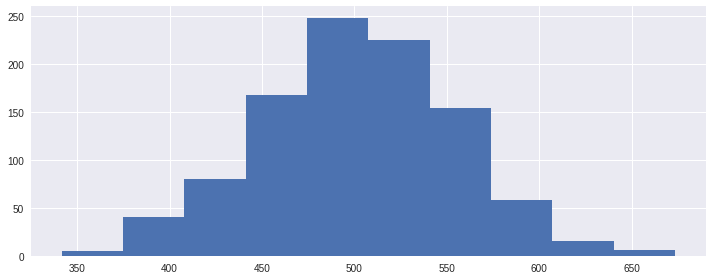

In [0]:
_, ax = plt.subplots(figsize=(10, 4))
sample_means = list()
mean_of_sample_mean = list()


for _ in range(1000):
    sample = np.random.choice(params, size=30)
    sample_means.append(np.mean(sample))
    sample_mean = np.mean(sample_means)
    mean_of_sample_mean.append(sample_mean)

ax.hist(sample_means)
plt.tight_layout()

In [0]:
mean, std = np.mean(sample_means), np.std(sample_means)
print(f'표본평균: {mean:.2f}')

표본평균: 499.57


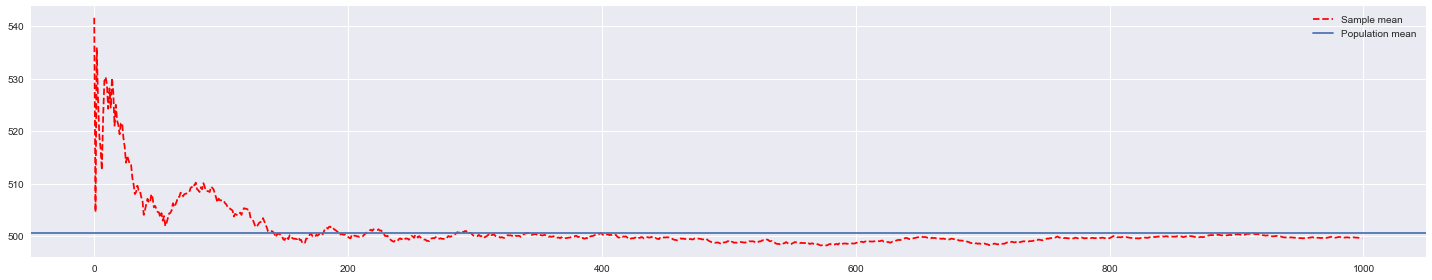

In [0]:
_, ax = plt.subplots(figsize=(20, 4))

ax.plot(mean_of_sample_mean, 'r--', label='Sample mean')
ax.axhline(500.5, label='Population mean')
plt.legend()
plt.tight_layout()

### 표준화한 표본평균의 분포

* 표준화한 표본평균 $Z_{\bar{x}}$는 표준정규분포(Z분포)를 따른다.
* 표준화 표본평균 
$$Z_\bar{x} = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

### 표준화한 표본평균의 분포(t 분포)

* 모분산을 알 수 없기 때문에 불편표준오차로 스튜던트화한 표본평균 $t_{\bar{x}}$는 t분포를 따른다.
* t 분포의 자유도 = $n - 1$
* 불편표준오차
  * $\frac{s}{\sqrt{n - 1}}$
* 표본평균 스튜던트화한 통계량
  * $t_{\bar{x}} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n - 1}}}$

### 표본비율의 분포

* 표본비율 $\hat{p}$의 분자인 **어떤 성질을 갖는 요소의 수 $x$**는 이항분포를 따른다.
* 하계 워크샵 장소 찬성율을 표본조사했을 때($n = 100$), 30명이 찬성이라고 했을 때($x = 30$) 표본비율 $\hat{p}$은 $0.3$가 된다.


* 이항분포의 평균은 $np$, 분산은 $np(1-p)$를 따른다.
* 이 때, 표본비율의 평균은 $p(1-p)$가 되고, 모표준오차는 $\sqrt{\frac{p(1-p)}{n}}$을 따른다.
* n이 충분히 클 때, 이항분포는 정규분포에 가까워지고 이 때 표본비율은 평균이 $p$이고 모표준오차가 $\sqrt{\frac{p(1-p)}{n}}$의 정규분포를 따른다고 볼 수 있다.

### 표본분산의 분포($\chi^2$분포)

* 표본분산 $s^2$이 따르는 확률분포는 없다.
* 따라서 $\chi^2$분포를 따르도록 표본분산 $s^2$ 또는 불편분산 $\hat{\sigma}$와 비례하는 통계량으로 변환한다.
* 표본분산 $s^2$와 비례하는 $\chi^2$통계량

$$\frac{n \times s^2}{\sigma^2}$$

* 불편분산 $\hat{\sigma}^2$와 비례하는 $\chi^2$ 통계량 
$$\frac{(n-1) \times \hat{\sigma}^2}{\sigma^2}$$

### 상관계수의 분포

* 모상관계수 $\rho$가 0이 아닌 경우 표본상관계수 $r$은 좌편포(꼬리가 왼쪽, $S_w < 0$)이다.
* 이 때 **피셔의 z변환**을 이용해 변환 시 정규분포를 따르게 된다. 이 값을 이용해 모상관계수의 신뢰구간 추정이 가능해진다.


* **피셔의 z 변환**
$$z_r = \frac{1}{2}\log(\frac{1+r}{1-r})$$

* 이때 피셔의 z변환은 삼각함수(역쌍곡선함수)를 사용한 것이므로 여기서는 넘어간다.

* 모상관계수 $\rho$가 0인 경우(무상관인 경우), 표본상관계수 $r$은 스튜던트화해 t분포를 따른다.
* 앞서 이야기했듯 여기서 자유도는 $n-2$이다.

### 오차의 종류

* 오차: 참값인 모수와 표본에서 계산된 통계량 사이의 차이.
* 계통오차: 오차과 일관된 특성이 있다. 예를 들어 특정 몸무게 저울이 0.01g 수준에서 다른 저울과 차이있는 경우 계통오차로 볼 수 있다.
* 우연오차: 오차가 일관되지 않는다. 예를 들어 아침에 재는 키와 저녁에 재는 키가 다르다는 통제 가능한 오차가 아니고 이런 오차를 우연오차라고 볼 수 있다.
* 표준오차: 표본분포가 고르지 않은 것. 표본평균의 우연 오차 지표이다.
* 표준오차는 표준편차를 자유도의 제곱근으로 나눈 것이므로 표본크기가 커지면 작아진다.

### 중심극한 정리

* n이 충분히 커지면 표본평균은 정규분포한다는 것을 보증한다. 이 정리는 테일러급수 등 대학 미적분이 필요한 내용이므로 여기서는 개념을 기술하지 않는다.